# Multiclass classification

When you have more than two classes as an option, it's known as multi-class classification.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classe, it's multi-class classification

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

2024-03-26 12:56:18.084427: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-26 12:56:18.227148: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-26 12:56:18.694689: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-26 12:56:20.254175: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

# print(f"Test sample:\n{test_data[0]}\n")
# print(f"Test label:\n{test_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

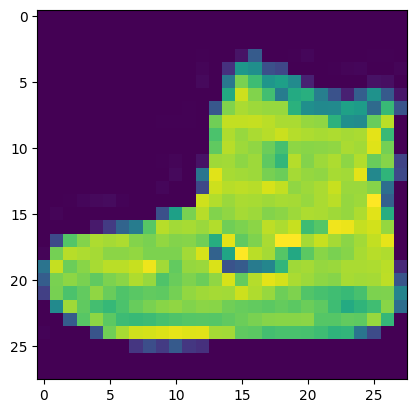

In [4]:
# Plot a single sample
import matplotlib.pyplot as plt

plt.imshow(train_data[0]);

In [5]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt')

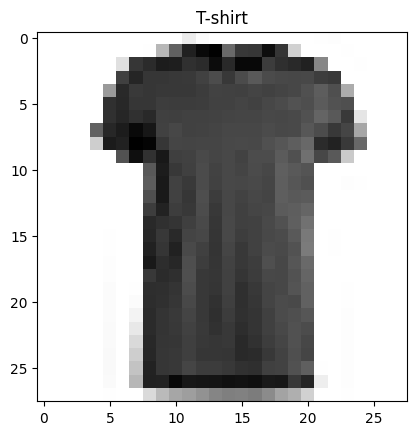

In [6]:
# Plot an example image and its label
index = 17
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

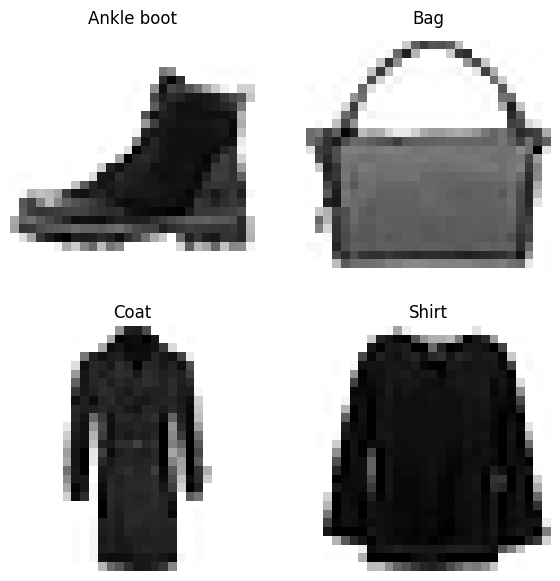

In [7]:
# Plot multiple random images of fahsion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model we can use a similar architecture to our binary classifiers, however we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function:
  * tf.keras.losses.CategoricalCrossentropy() for one-hot encoded data
  * tf.keras.losses.SparseCategoricalCrossentropy for integer form data
* Output layer activation = Softmax

In [8]:
# our data needs to be flattened (from 28*28 to None,784) 
flatten_model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten()
])
flatten_model.output_shape

(None, 784)

In [9]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, 
                               validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1143 - loss: 4.3231 - val_accuracy: 0.1906 - val_loss: 2.0760
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1858 - loss: 2.0703 - val_accuracy: 0.1939 - val_loss: 2.0508
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2130 - loss: 1.9967 - val_accuracy: 0.2589 - val_loss: 1.8240
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2786 - loss: 1.7683 - val_accuracy: 0.3271 - val_loss: 1.5722
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.3261 - loss: 1.5520 - val_accuracy: 0.3500 - val_loss: 1.4967
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.3340 - loss: 1.4929 - val_accuracy: 0.3465 - val_loss: 1.4628
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3410 - loss: 1.4640 - val_accuracy: 0.3573 - val_loss: 1.4473
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3446 - loss: 1.4527 - 

In [10]:
# Check the model summary
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [11]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this mean they like to have the numbers in the tensors they try to find patterns between 0 & 1

In [12]:
# We can get our training and testing data between 0 & 1 by dividing by the maxiumum 
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [13]:
# Now our data is normalized, let's build a model to find patterns in it
tf.random.set_seed(42)

# Build a model
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
norm_history_2 = model_2.fit(
    train_data_norm, tf.one_hot(train_labels, depth=10), epochs=10,
    validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3263 - loss: 1.7115 - val_accuracy: 0.6406 - val_loss: 1.0091
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6545 - loss: 0.9418 - val_accuracy: 0.7317 - val_loss: 0.7880
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7390 - loss: 0.7540 - val_accuracy: 0.7568 - val_loss: 0.6978
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7645 - loss: 0.6677 - val_accuracy: 0.7695 - val_loss: 0.6538
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7757 - loss: 0.6290 - val_accuracy: 0.7744 - val_loss: 0.6344
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7840 - loss: 0.6091 - val_accuracy: 0.7808 - val_loss: 0.6216
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7907 - loss: 0.5953 - val_accuracy: 0.7848 - val_loss: 0.6130
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7954 - loss: 0.5847 - 

### Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1

Text(0, 0.5, 'loss')

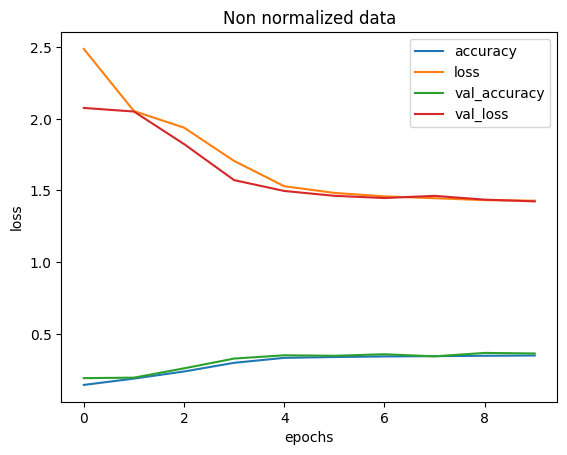

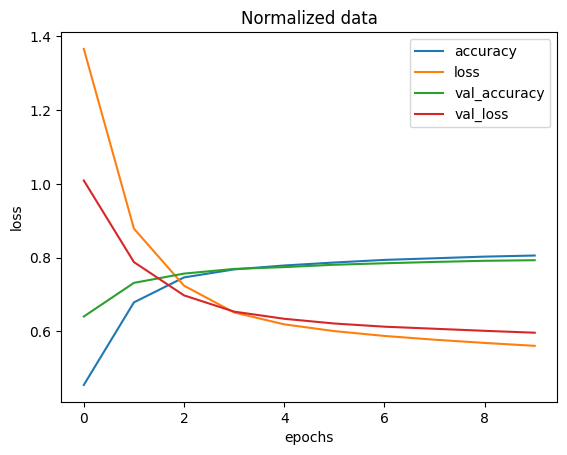

In [14]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non normalized data")
plt.xlabel("epochs")
plt.ylabel("loss")

pd.DataFrame(norm_history_2.history).plot(title="Normalized data")
plt.xlabel("epochs")
plt.ylabel("loss")

The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture)

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history_3 = model_3.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=40,
                                validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)),
                                callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4130 - loss: 1.4432 - val_accuracy: 0.6877 - val_loss: 0.8141 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7207 - loss: 0.7552 - val_accuracy: 0.7472 - val_loss: 0.6969 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7550 - loss: 0.6760 - val_accuracy: 0.7607 - val_loss: 0.6692 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7669 - loss: 0.6491 - val_accuracy: 0.7687 - val_loss: 0.6513 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7734 - loss: 0.6316 - val_accuracy: 0.7731 - val_loss: 0.6422 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7781 - loss: 0.6185 - val_accuracy: 0.7745 - val_loss: 0.6361 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7817 - l

Text(0.5, 1.0, 'Finding the ideal learning rate')

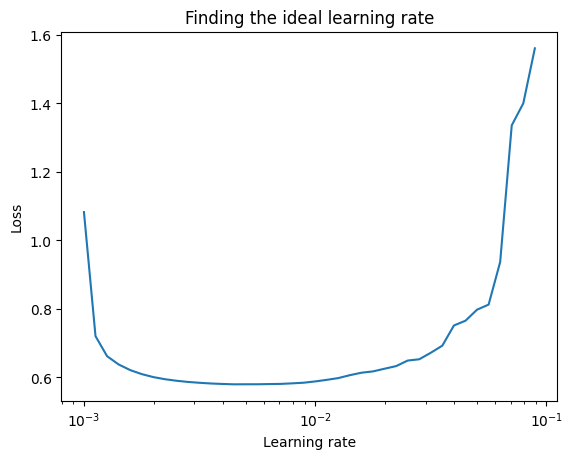

In [16]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history_3.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

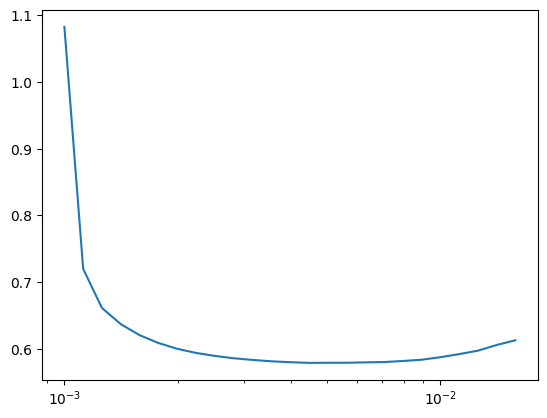

In [17]:
plt.semilogx(lrs[:25], find_lr_history_3.history["loss"][:25])

The default learning rate of the Adam optimizer was the right learning rate - 0.001

## Evaluating out multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its perfomance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

In [37]:
# Create prediction probabilities from our model
y_probs = model_2.predict(test_data_norm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step


Visualize our data

In [38]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [39]:
y_probs

array([[6.31029998e-21, 6.22447580e-12, 1.30796152e-10, ...,
        1.30327091e-01, 6.57014016e-06, 5.75392127e-01],
       [2.51032354e-04, 4.58268111e-11, 7.87212372e-01, ...,
        9.76798378e-31, 3.38856648e-06, 1.64976832e-28],
       [5.47256414e-03, 9.51059878e-01, 2.77755852e-03, ...,
        4.07747400e-04, 1.28656044e-04, 1.21515775e-04],
       ...,
       [1.16353929e-02, 1.06232775e-07, 1.26361288e-03, ...,
        1.06348411e-11, 6.61104739e-01, 1.80556211e-15],
       [4.84888069e-03, 9.54378426e-01, 2.53207982e-03, ...,
        5.09219535e-04, 1.25037404e-04, 1.49785381e-04],
       [5.51348167e-09, 6.04046954e-06, 4.13445159e-05, ...,
        1.03274249e-02, 3.81506756e-02, 4.80762043e-04]], dtype=float32)

In [40]:
# y_probs need to be rounded
y_preds = tf.argmax(y_probs, axis=1)
y_preds

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>

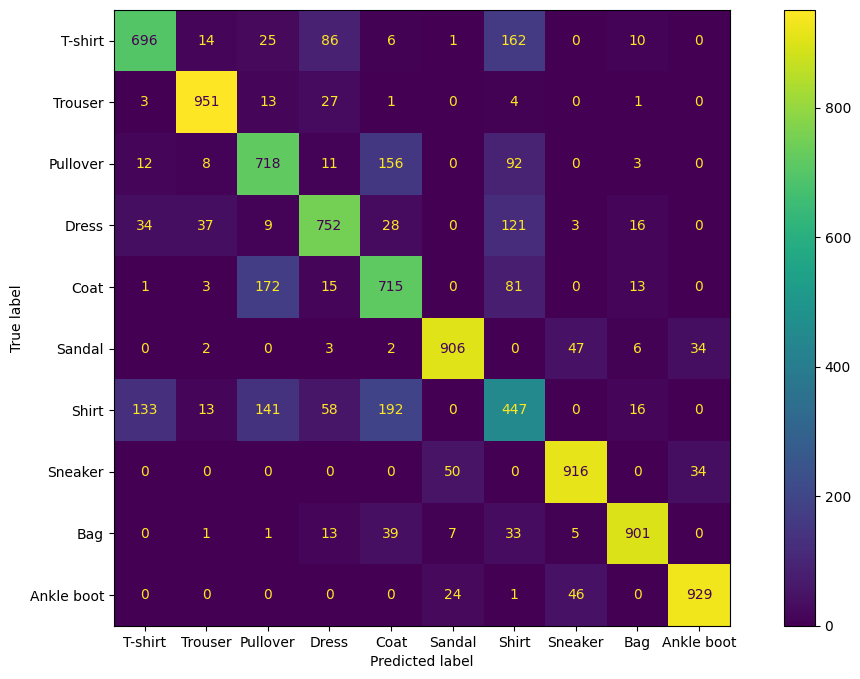

In [86]:
# Create confusion matrix and visualize it
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_mat_2 = confusion_matrix(y_true=test_labels, y_pred=y_preds)

conf_mat_dis = ConfusionMatrixDisplay(conf_mat_2, display_labels=class_names)
fig, ax = plt.subplots(figsize=(14,8))
conf_mat_dis.plot(ax=ax)

In [88]:
# Check accuracy
good_p = 0
wrong_p = 0
for index in range(len(y_preds)):
    if y_preds[index] == test_labels[index]:
        good_p += 1
    else:
        wrong_p += 1
if good_p >= wrong_p:
    model_2_accuracy = 1 - wrong_p / good_p
elif wrong_p > good_p:
    model_2_accuracy = 1 - good_p / wrong_p

print(f"Good predictions = {good_p}\nWrong predictions = {wrong_p}\nAccuracy = {model_2_accuracy}")

Good predictions = 7931
Wrong predictions = 2069
Accuracy = 0.7391249527171857
